In [74]:
import numpy as np

# initialize parameters

## 2-layer neural network

forword propagation: Linear->Relu->Linear->sigmoid

In [75]:
def initialize_parameters(n_x,n_h,n_y):
    """
    Returns:
    params:
    W1:(n_h,n_x)
    b1:(n_h,1)
    W2:(n_y,n_h)
    b2:(n_y,1)
    """
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    params={'W1':W1,
            'W2':W2,
            'b1':b1,
            'b2':b2}
    
    return params

## deep neural network

forword propagation: [Linear->Relu]*(L-1)->Linear->sigmoid

layer_dims=[2,4,1]  
  
the size of input is 2  
There is only one hidden layer which has a size of 4  
the size of output is 1

In [76]:
def initialize_parameters_deep(layer_dims):
    """
    Returns:
    paramters  W,b
    """
    L=len(layer_dims)-1
    parameters={}
    
    for layer in range(1,L+1):
        parameters['W'+str(layer)]=np.random.rand(layer_dims[L],layer_dims[L-1])*0.01
        parameters['b'+str(layer)]=np.random.rand(layer_dims[L],1)
    return parameters   


# forward propagation

## linear_forward+cache(A,W,b)

In [77]:
def linear_forward(W,A,b):
    """
    Z[l]=W[l]*A[l-1]+b[l]
    
    Argument:
    A:output of layer l-1   (n_l-1,m)
    W:(n[l],n[l-1])
    b:(n[l],m)
   
    Returns:
    Z: 
    cache: (A,W,b)
    """
    
    Z=np.dot(W,A)+b#(n[l],m)
    
    cache=(A,W,b)
    return Z,cache


## activation function+cache(Z)

### sigmoid

In [78]:
def sigmoid(Z):
    """
    Returns:
    A
    cache: (Z,)
    """
    A=1/(1+np.exp(-Z))
    cache=(Z,)
    return A,cache

### Relu

In [144]:
def relu(Z):
    """
    Returns:
    A
    cache:(Z,)
    """
    A=np.where(Z>0,Z,0)
    cache=(Z,)
    return A,cache

## Linear activation forward

In [80]:
def linear_activation_forward(A_previous,W,b,activation):
    """
    Argument:
    
    Activation: either 'sigmoid' or 'relu'
    
    Returns:
    A
    cache:(linear_cache,activation_cache) = ((A,W,b),(Z,))
    
    """
    if activation=='sigmoid':
        Z,linear_cache=linear_forward(W,A_previous,b)
        A,activation_cache=sigmoid(Z)
    if activation=='relu':
        Z,linear_cache=linear_forward(W,A_previous,b)
        A,activation_cache=relu(Z)
        
    cache=(linear_cache,activation_cache)
    return A,cache
        

## overall forward

In [81]:
def L_model_forward(X,parameters):
    """
    Returns:
    caches: list of all cache
    AL: A of layer L
    """
    caches=[]
    A=X
    L=len(parameters)//2
    
    for layer in range(1,L):
        A,cache=linear_activation_forward(A,parameters['W'+str(layer)],parameters['b'+str(layer)],'relu')
        caches.append(cache)
    
    AL,cache=linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],'sigmoid')
    caches.append(cache)
    
    return AL,caches

# compute cost

In [82]:
def compute_cost(AL,Y):
    """
    Argument:
    AL: A(output of layer L)  (n[L],m)
    Y:  (n[L],m)
    
    Returns:
    cost
    """
    m=Y.shape[1]
    cost=-1/m*(np.dot(Y,np.log(AL.T))+np.dot(1-Y,np.log(1-AL.T)))
    cost=np.squeeze(cost)
    return cost
    

# backward propagation

## linear backward

In [161]:
def linear_backward(dZ,cache):
    
    """
    Argument:
    dZ
    cache:(A,W,b)
    
    Returns:
    dA_prev
    dW
    db
    """
    m=dZ.shape[1]
    A_prev,W,b=cache
    dW=1/m*np.dot(dZ,A_prev.T)
    db=1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev=np.dot(W.T,dZ)
    
    return dA_prev,dW,db

## linear acivation backward

### sigmoid backward

In [159]:
def sigmoid_backward(dA,activation_cache):
    """
    Argument:
    dA
    activation_cache:(Z,)
    Returns:
    dZ
    """
    Z=activation_cache[0]
    s,temp=sigmoid(Z)
    dZ=dA*s*(1-s)
    assert(Z.shape==dZ.shape)
    
    return dZ
    

### Relu backward

In [164]:
def relu_backward(dA,activation_cache):
    """
    Argument:
    activation_cache
    Returns:
    dZ
    """
    Z=activation_cache[0]
    
    dZ=np.array(dA,copy=True)
    dZ[Z<=0]=0

    assert(Z.shape==dZ.shape)
    
    return dZ
    

In [86]:
def linear_activation_backward(dA,cache,activation):
    """
    Argument:
    dA,
    cache:(linear_cache(W,A,b),activation_cache(Z,))
    activation:either 'sigmoid' or 'relu'
    
    Returns:
    dA_prev,dW,db
    """
    
    linear_cache,activation_cache=cache
    
    if activation=='relu':
        dZ=relu_backward(dA,activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
    if activation=='sigmoid':
        dZ=sigmoid_backward(dA,activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
    
    return dA_prev,dW,db
    

## overall backward

In [87]:
def L_model_backward(AL,Y,caches):
    """
    Returns:
    grads
    """
    
    grads={}
    
    L=len(caches)
    
    #derivative of cost with respect to AL
    dAL=-(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    
    dA_prev,dW,db=linear_activation_backward(dAL,caches[-1],'sigmoid')
    grads['dA'+str(L)]=dA_prev
    grads['dW'+str(L)]=dW
    grads['db'+str(L)]=db
    
    for index in reversed(range(L-1)):
        cache=caches[index]
        dA_prev,dW,db=linear_activation_backward(grads['dA'+str(index+2)],cache,'relu')
        grads['dA'+str(L+1)]=dA_prev
        grads['dW'+str(L+1)]=dW
        grads['db'+str(L+1)]=db
        
    return grads


# update parameters

In [88]:
def update_parameters(parameters,grads,learning_rate):
    """
    Returns:
    parameters
    """
    L=len(parameters)//2
    for index in range(1,L+1):
        parameters['W'+str(L)]-=learning_rate*grads['dW'+str(L)]
        parameters['b'+str(L)]-=learning_rate*grads['db'+str(L)]
    return parameters
    

# overall model

## pre

In [89]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import *
%matplotlib inline

In [90]:
plt.rcParams['figure.figsize']=(5.0,4.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'
#run configuration
np.random.seed(1)

## dataset

In [91]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

In [92]:
print(train_x_orig.shape)
print(train_y.shape)
print(test_x_orig.shape)
print(test_y.shape)
print(classes.shape)
print(classes)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)
(2,)
[b'non-cat' b'cat']


In [112]:
train_x=train_x_orig.reshape(209,-1).T/255
test_x=test_x_orig.reshape(50,-1).T/255
print(test_x[:,1])

[0.45098039 0.43137255 0.43529412 ... 0.67058824 0.69019608 0.72941176]


### show a picture

y=1.It's a cat picture.


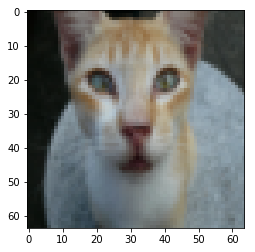

In [93]:
index=11
plt.imshow(train_x_orig[index])
print('y='+str(train_y[0,index])+".It's a "+classes[train_y[0,index]].decode('utf-8')+ ' picture.')

In [115]:
m_train=train_x_orig.shape[0]
m_test=test_x_orig.shape[0]
num_px=train_x_orig.shape[1]

## two-layer-model

In [120]:
n_x=64*64*3
n_h=7
n_y=1

In [170]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    n_x,n_h,n_y=layers_dims
    params=initialize_parameters(n_x,n_h,n_y)
    A_previous=X
    grads={}
    costs=[]
    m=X.shape[1]
    
    for i in range(num_iterations):
        W1=params['W1']
        b1=params['b1']
        W2=params['W2']
        b2=params['b2']
        A1,cache1=linear_activation_forward(A_previous,W1,b1,'relu')
        A2,cache2=linear_activation_forward(A1,W2,b2,'sigmoid')
        
        cost=compute_cost(A2,Y)
        
        dA2=-(np.divide(Y,A2)-np.divide(1-Y,1-A2))
        dA1,dW2,db2=linear_activation_backward(dA2,cache2,'sigmoid')
        dA0,dW1,db1=linear_activation_backward(dA1,cache1,'relu')
        
        grads['dW1']=dW1
        grads['dW2']=dW2
        grads['db1']=db1
        grads['db2']=db2

        params=update_parameters(params,grads,learning_rate)
        
        if print_cost==True and i%100==0:
            print('cost if iteration {} is :{}'.format(i,np.squeeze(cost)))
        if i%100==0:
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return params
        

cost if iteration 0 is :0.6928764721854479
cost if iteration 100 is :0.6668272946902015
cost if iteration 200 is :0.6549503163335703
cost if iteration 300 is :0.6494305439741426
cost if iteration 400 is :0.6468022802092679
cost if iteration 500 is :0.6455102690141772
cost if iteration 600 is :0.6448444794711786
cost if iteration 700 is :0.6444755924431472
cost if iteration 800 is :0.6442489127510613
cost if iteration 900 is :0.6440910688787717
cost if iteration 1000 is :0.6439670112244946
cost if iteration 1100 is :0.643859907492897
cost if iteration 1200 is :0.6437616407905769
cost if iteration 1300 is :0.6436682828596827
cost if iteration 1400 is :0.6435779250484995
cost if iteration 1500 is :0.6434896347336667
cost if iteration 1600 is :0.64340295177051
cost if iteration 1700 is :0.6433176450258312
cost if iteration 1800 is :0.6432335944954151
cost if iteration 1900 is :0.643150734172481
cost if iteration 2000 is :0.6430690243411068
cost if iteration 2100 is :0.6429884381339817
cost

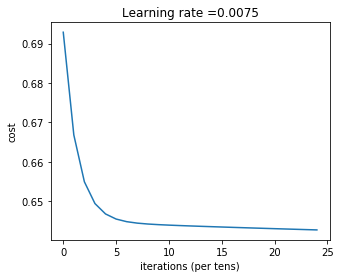

In [171]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x,n_h,n_y), num_iterations = 2500, print_cost=True)